In [1]:
import pandas as pd
import numpy as np
from plotnine import *

from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

from sklearn.compose import make_column_selector, ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import GridSearchCV

In [2]:
#!pip install palmerpenguins

# Palmer Penguins Modeling

Import the Palmer Penguins dataset and print out the first few rows.

Suppose we want to predict `bill_depth_mm` using the other variables in the dataset.

**Dummify** all variables that require this.

In [3]:
from palmerpenguins import load_penguins

In [4]:
penguins = load_penguins()
penguins = penguins.dropna()
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007


Let's use the other variables to predict `bill_depth_mm`. Prepare your data and fit the following models on the entire dataset:

* Your best multiple linear regression model from before
* Two kNN models (for different values of K) or different features
* A decision tree model

Create a plot like the right plot of Fig 1. in our `Model Validation` chapter with the training and test error plotted for each of your four models.

Which of your models was best?

In [5]:
#MODEL 1

#creating the target and the predictor variables
X= penguins.drop(['bill_depth_mm'], axis=1)
y= penguins['bill_depth_mm']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 87)

# Best Multiple Linear Regression Model from Before

In [6]:
penguins[0:1]

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007


In [7]:
# Model 1 Multiple Regression

#Preprocessor as a column transformer that dumifies, standardizes.
ct = ColumnTransformer(
  [
    ("dummify", OneHotEncoder(), ["species","island","sex"]),
    ("standardize", StandardScaler(), ["bill_length_mm", "flipper_length_mm", "body_mass_g"])
  ],
  remainder = "drop"
)

#putting the preprocessor and model spec in the pipeline creation
model_1_pipeline = Pipeline(
  [("preprocessing", ct),
  ("linear_regression", LinearRegression())]
)

#fitting the model on test set
model_1 = model_1_pipeline.fit(X_train, y_train)
model_1

#predictions for the test data
model_1_test_pred = model_1.predict(X_test)

#predictions for the training data
model_1_train_pred = model_1.predict(X_train)

# getting the mse_test
model_1_mse_test = mean_squared_error(y_test, model_1_test_pred)
print(f"Mean Squared Error (MSE) Test Data: {model_1_mse_test}")

# getting the mse_train
model_1_mse_train = mean_squared_error(y_train, model_1_train_pred)
print(f"Mean Squared Error (MSE) Training Data: {model_1_mse_train}")

# number of features for model 1
features_model_1 = len(ct.get_feature_names_out())
print(f"Number of features: {features_model_1}")

Mean Squared Error (MSE) Test Data: 0.5564994954807096
Mean Squared Error (MSE) Training Data: 0.6409391752966961
Number of features: 11


# KNN with K=30

In [8]:
#Model Specification
knn = KNeighborsRegressor(n_neighbors=30)

#Preprocessor as a column transformer that dumifies, standardizes.
ct = ColumnTransformer(
  [
    ("dummify", OneHotEncoder(), ["species","sex"]),
    ("standardize", StandardScaler(), ["bill_length_mm","flipper_length_mm","body_mass_g"])
  ],
  remainder = "drop"
)

#putting the preprocessor and model spec in the pipeline creation
model_2_pipeline = Pipeline(
  [("preprocessing", ct),
  ("knn_regression", knn)]
)

#fitting the model on test set
model_2 = model_2_pipeline.fit(X_train, y_train)
model_2

#predictions for the test data
model_2_test_pred = model_2.predict(X_test)

#predictions for the training data
model_2_train_pred = model_2.predict(X_train)

# getting the mse_test
model_2_mse_test = mean_squared_error(y_test, model_2_test_pred)
print(f"Mean Squared Error (MSE) Test Data: {model_2_mse_test}")

# getting the mse_train
model_2_mse_train = mean_squared_error(y_train, model_2_train_pred)
print(f"Mean Squared Error (MSE) Training Data: {model_2_mse_train}")

# number of features for model 2
features_model_2 = len(ct.get_feature_names_out())
print(f"Number of features: {features_model_2}")

Mean Squared Error (MSE) Test Data: 0.6553317460317458
Mean Squared Error (MSE) Training Data: 0.6729900044622936
Number of features: 8


# KNN with K=7

In [9]:
#Model Specification
knn = KNeighborsRegressor(n_neighbors=7)

#Preprocessor as a column transformer that dumifies, standardizes.
ct = ColumnTransformer(
  [
    ("dummify", OneHotEncoder(), ["species","sex"]),
    ("standardize", StandardScaler(), ["bill_length_mm","flipper_length_mm"])
  ],
  remainder = "drop"
)

#putting the preprocessor and model spec in the pipeline creation
model_3_pipeline = Pipeline(
  [("preprocessing", ct),
  ("knn_regression", knn)]
)

#fitting the model on test set
model_3 = model_3_pipeline.fit(X_train, y_train)
model_3

#predictions for the test data
model_3_test_pred = model_3.predict(X_test)

#predictions for the training data
model_3_train_pred = model_3.predict(X_train)

# getting the mse_test
model_3_mse_test = mean_squared_error(y_test, model_3_test_pred)
print(f"Mean Squared Error (MSE) Test Data: {model_3_mse_test}")

# getting the mse_train
model_3_mse_train = mean_squared_error(y_train, model_3_train_pred)
print(f"Mean Squared Error (MSE) Training Data: {model_3_mse_train}")

# number of features for model 3
features_model_3 = len(ct.get_feature_names_out())
print(f"Number of features: {features_model_3}")

Mean Squared Error (MSE) Test Data: 0.5301214771622936
Mean Squared Error (MSE) Training Data: 0.5892090812228504
Number of features: 7


# Decision Tree Regressor alpha = .5

In [10]:
#model specification
dt = DecisionTreeRegressor(ccp_alpha=.3)

#Preprocessor as a column transformer that dumifies, standardizes.
ct = ColumnTransformer(
  [
    ("dummify", OneHotEncoder(), ["species","island","sex"]),
    ("standardize", StandardScaler(), ["bill_length_mm", "bill_length_mm", "body_mass_g"])
  ],
  remainder = "drop"
)

#putting the preprocessor and model spec in the pipeline creation
model_4_pipeline = Pipeline(
  [("preprocessing", ct),
  ("dt_regression", dt)]
)

#fitting the model on test set
model_4 = model_4_pipeline.fit(X_train, y_train)
model_4

#predictions for the test data
model_4_test_pred = model_4.predict(X_test)

#predictions for the training data
model_4_train_pred = model_4.predict(X_train)

# getting the mse_test
model_4_mse_test = mean_squared_error(y_test, model_4_test_pred)
print(f"Mean Squared Error (MSE) Test Data: {model_4_mse_test}")

# getting the mse_train
model_4_mse_train = mean_squared_error(y_train, model_4_train_pred)
print(f"Mean Squared Error (MSE) Training Data: {model_4_mse_train}")

# number of features for model 3
features_model_4 = len(ct.get_feature_names_out())
print(f"Number of features: {features_model_4}")

Mean Squared Error (MSE) Test Data: 0.787351127752493
Mean Squared Error (MSE) Training Data: 0.9151258021650229
Number of features: 11


In [11]:
data = {
    "features": [features_model_1, features_model_2, features_model_3, features_model_4],
    "mse_test": [model_1_mse_test, model_2_mse_test, model_3_mse_test, model_4_mse_test],
    "mse_train": [model_1_mse_train, model_2_mse_train, model_3_mse_train, model_4_mse_train],
    "model": ["model_1", "model_2", "model_3", "model_4"]
}

metric_df = pd.DataFrame(data)
metric_df

,features,mse_test,mse_train,model
0,11,0.556499,0.640939,model_1
1,8,0.655332,0.672990,model_2
2,7,0.530121,0.589209,model_3
3,11,0.787351,0.915126,model_4


In [12]:
# Create a combined DataFrame with features, mse_train, mse_test, and model
combined_df = metric_df.melt(id_vars=['features', 'model'], var_name='mse_type', value_name='mse_value')
combined_df

,features,model,mse_type,mse_value
0,11,model_1,mse_test,0.556499
1,8,model_2,mse_test,0.655332
2,7,model_3,mse_test,0.530121
3,11,model_4,mse_test,0.787351
4,11,model_1,mse_train,0.640939
5,8,model_2,mse_train,0.672990
6,7,model_3,mse_train,0.589209
7,11,model_4,mse_train,0.915126


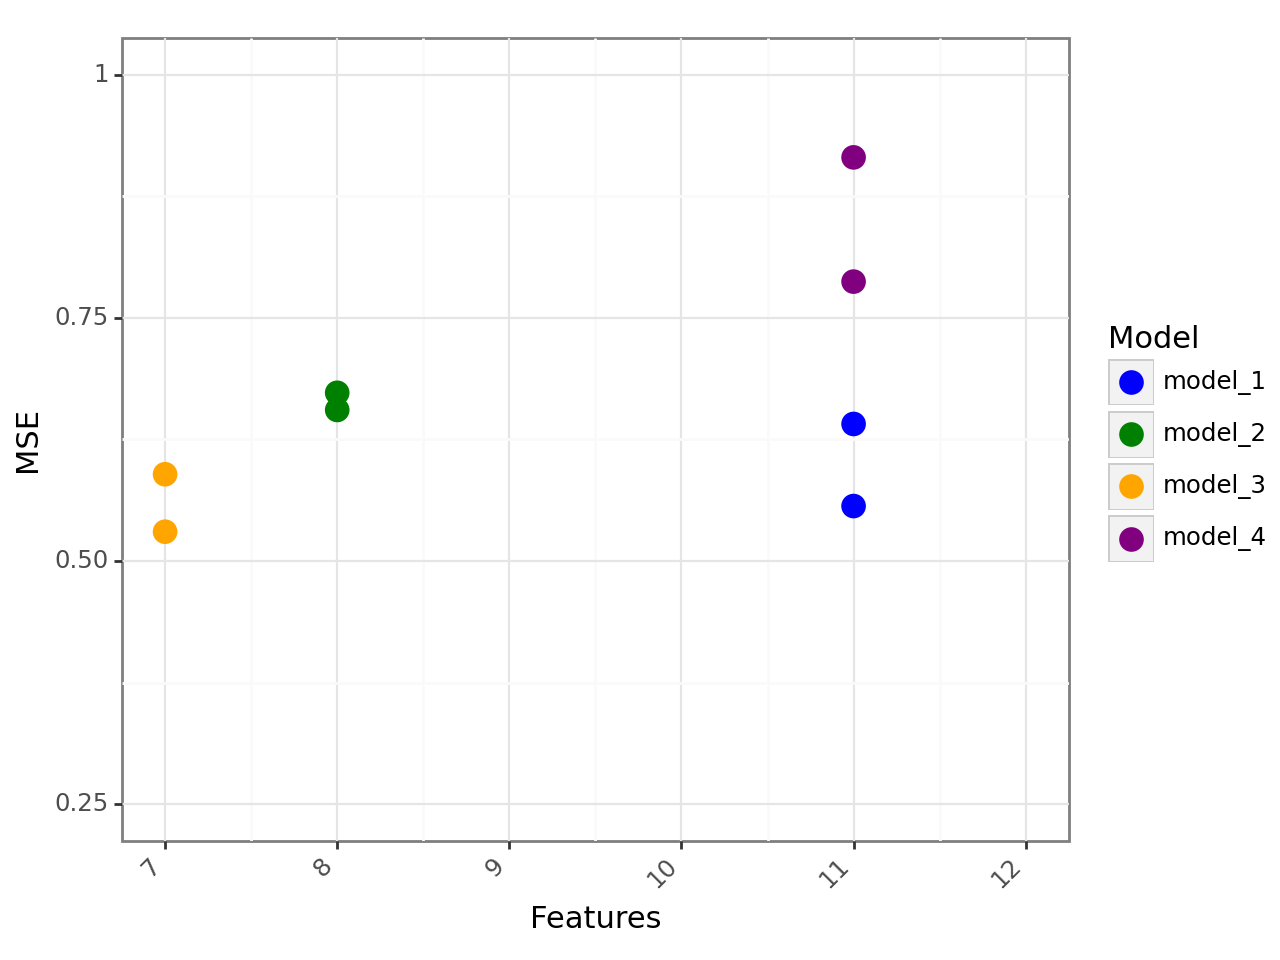

<Figure Size: (640 x 480)>

In [13]:
# Plotting the features and the MSE for the Models Training and Testing Scores
(ggplot(combined_df, aes(x='features', y='mse_value', color='model'))
+ geom_point(size = 4)
+ labs(x='Features', y='MSE')
+ theme_bw()
+ theme(axis_text_x=element_text(angle=45, hjust=1))
+ scale_y_continuous(limits=(0.25, 1), breaks=[0.25, 0.5, 0.75, 1])
+ scale_x_continuous(limits=(7,12), breaks=[7,8,9,10,11,12])
+ scale_color_manual(values={'model_full': 'red', 'model_1': 'blue', 'model_2': 'green', 'model_3': 'orange', 'model_4': 'purple'})
+ guides(color=guide_legend(title="Model"))
)

# Which of your models was best?

The model with the lowest MSE while staying as close to the training data as possible when compared to the testing data for me was model_3 which was the model where I used KNN with a K=7. Notably this model had more features than the compared KNN model_2. This makes sense as there was more information to make better predictions with. However, for model_2 with K=30, the test MSE was close to the train MSE. This shows the balance between complexity where if you allow more complexity it might start to overfit the training data and not be as flexible to new data.